In [1]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score , confusion_matrix, adjusted_rand_score , ConfusionMatrixDisplay

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("../data/heart_disease.csv")
df.head()

,PC1,PC7,PC5,PC2,PC10,PC4,PC6,target
0,-1.142929,-0.176824,0.876139,0.304724,0.912271,0.158837,0.595961,0
1,-2.754957,-0.803580,-0.784552,0.839171,-0.236447,0.662535,0.343510,1
2,-2.227239,0.727509,0.701716,-1.063098,0.172939,-0.004591,0.722079,1
3,1.140714,-0.620638,1.395045,-0.565884,-0.182818,-2.411838,-0.672393,0
4,1.701610,-0.685079,0.262726,-0.278171,-0.073178,-0.592310,0.785178,0


In [3]:
X = df.drop(columns=['target'])
y = df['target']

In [4]:
inertia = []
silhouette_scores = []
K = range(2, 16)  # Testing k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

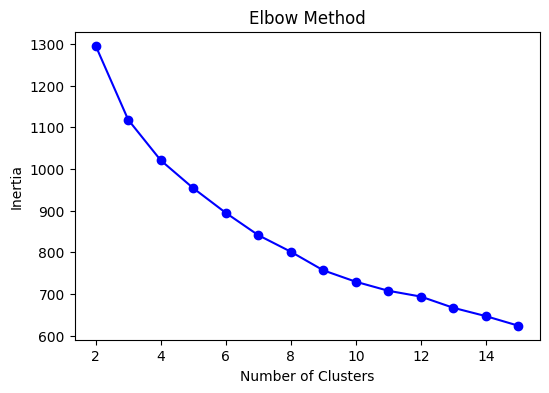

In [5]:
# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

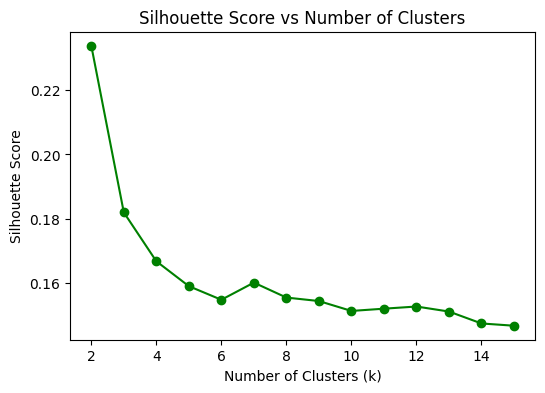

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [7]:
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"The Best k = {best_k}, with Silhouette Score = {max(silhouette_scores):.3f}")

The Best k = 2, with Silhouette Score = 0.234


In [8]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X)

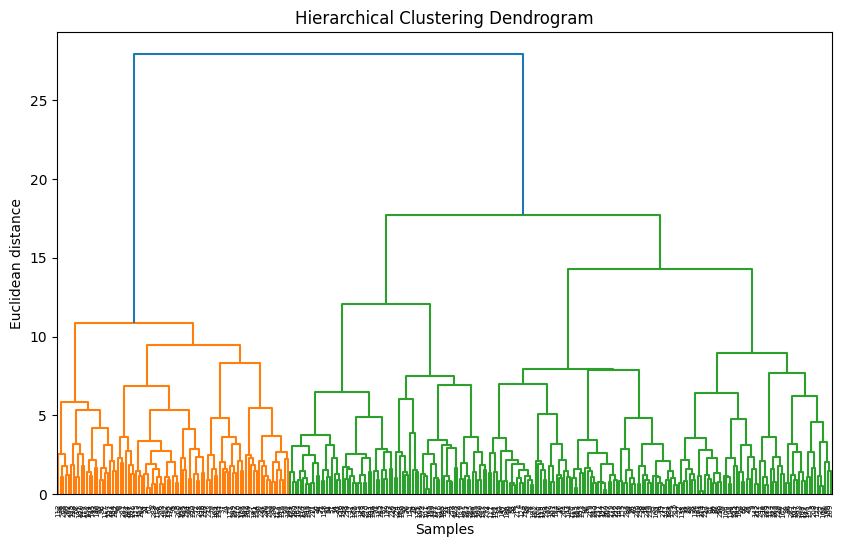

In [9]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()

<Figure size 600x500 with 0 Axes>

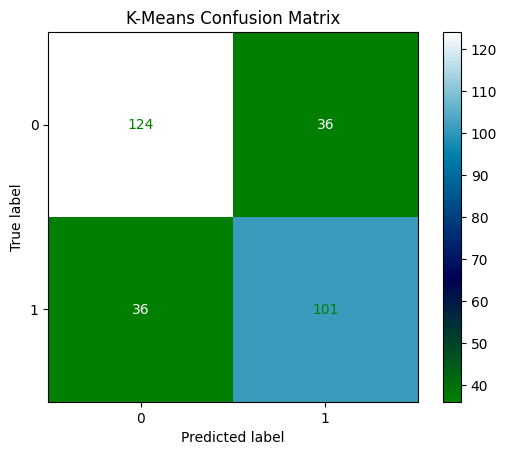

In [10]:
plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y, clusters, cmap='ocean', colorbar=True)
plt.title("K-Means Confusion Matrix")
plt.show()

In [11]:
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.2628941294471025
